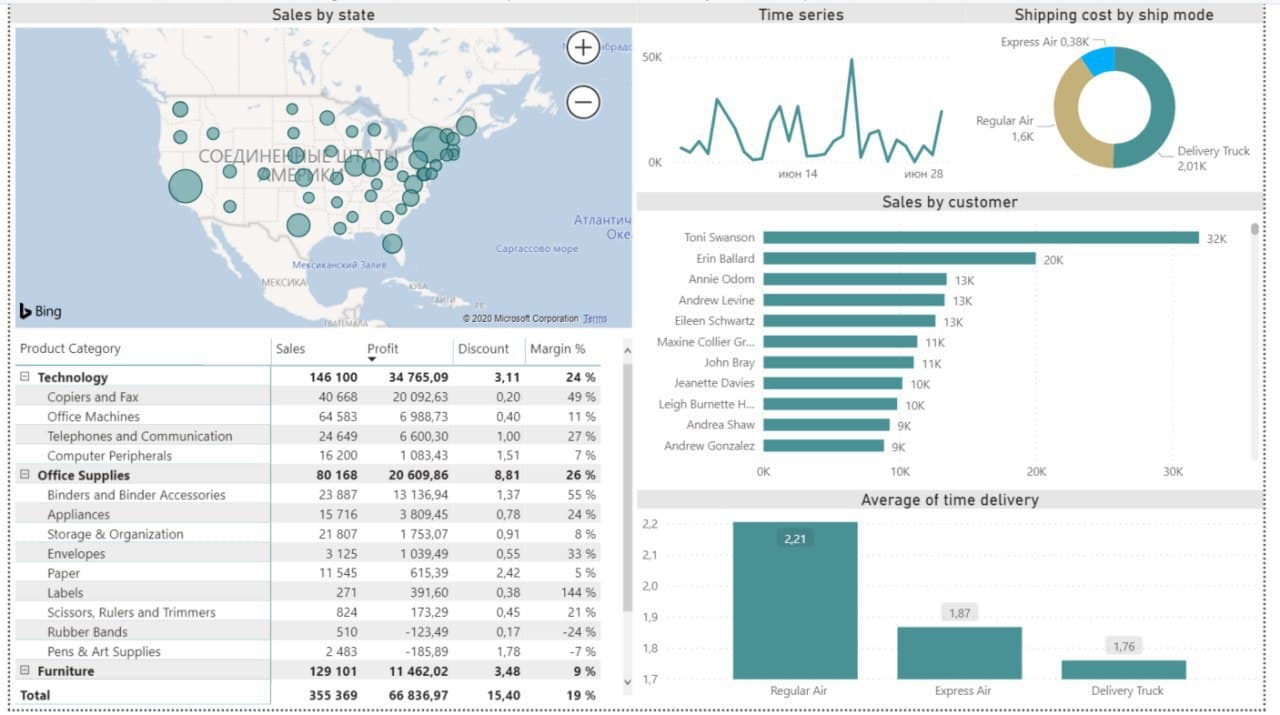

### Downloading the Data 


In [123]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

In [124]:
path = 'FOR_LAB_6.xlsx'
df_orders = pd.read_excel(path, sheet_name='Orders')
df_cust = pd.read_excel(path, sheet_name='Customers')
df_product = pd.read_excel(path, sheet_name='Product')

In [125]:
df_merge = df_orders.merge(df_cust, how='left', on='Customer ID')
df_merge.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Name,Product Base Margin,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Customer Name,Birthday
0,20847,High,0.01,2.84,0.93,3,Express Air,Corporate,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,...,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,Bonnie Potter,1990-01-01
1,20228,Not Specified,0.02,500.98,26.00,5,Delivery Truck,Home Office,Global Troy™ Executive Leather Low-Back Tilter,0.60,...,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,Ronnie Proctor,1990-01-02
2,21776,Critical,0.06,9.48,7.29,11,Regular Air,Home Office,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,...,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,Marcus Dunlap,1990-01-03
3,24844,Medium,0.09,78.69,19.99,14,Regular Air,Small Business,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,...,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,Gwendolyn F Tyson,1990-01-04
4,24846,Medium,0.08,3.28,2.31,14,Regular Air,Small Business,Newell 321,0.56,...,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,Gwendolyn F Tyson,1990-01-04


### Time Series

In [126]:
sales_by_date = df_merge.groupby(df_merge['Order Date'])['Sales'].sum()

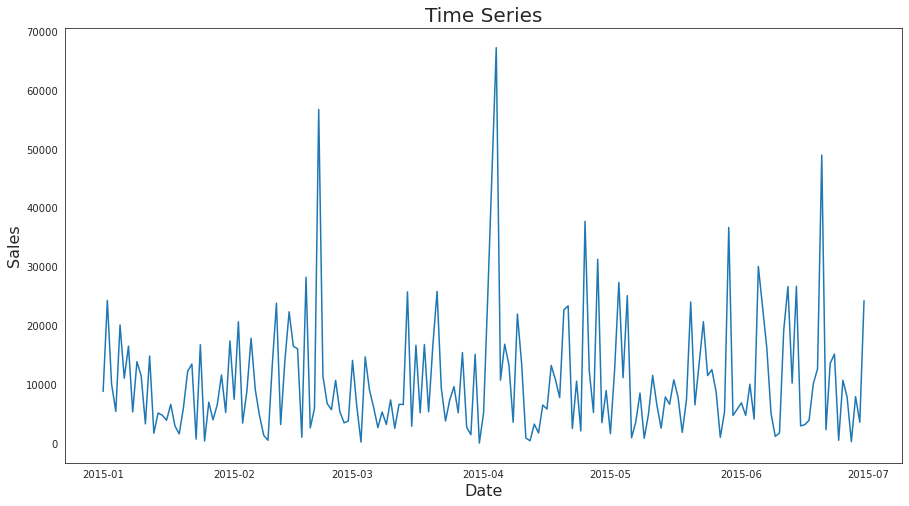

In [127]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Time Series', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Sales', fontsize=16)
ax.plot(sales_by_date);

### Shipping cost by ship mode

In [128]:
shipping_cost = df_merge.groupby(df_merge['Ship Mode'])['Shipping Cost'].sum()
shipping_cost

Ship Mode
Delivery Truck    12137.80
Express Air        2191.46
Regular Air       10984.57
Name: Shipping Cost, dtype: float64

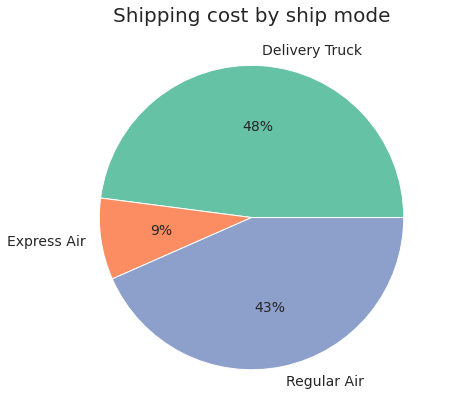

In [129]:
colors = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(8,7))
plt.pie(shipping_cost, labels = shipping_cost.index, colors = colors, 
        autopct='%.0f%%', textprops={'fontsize': 14})
plt.title('Shipping cost by ship mode', fontsize=20)
plt.show()

### Sales by customer

In [130]:
sales_by_cust = df_merge.groupby(df_merge['Customer Name'])['Sales'].sum().sort_values(ascending=False)
sales_by_cust

Customer Name
Kristine Connolly     50475.31
Nina Horne Kelly      48295.12
Toni Swanson          32194.12
Rosemary O'Brien      29916.01
Yvonne Mann           28779.13
                        ...   
Elsie Pridgen             6.97
Catherine Mullins         5.90
Tonya Miller              4.21
Phillip Chappell          3.51
Christina Matthews        3.42
Name: Sales, Length: 1130, dtype: float64

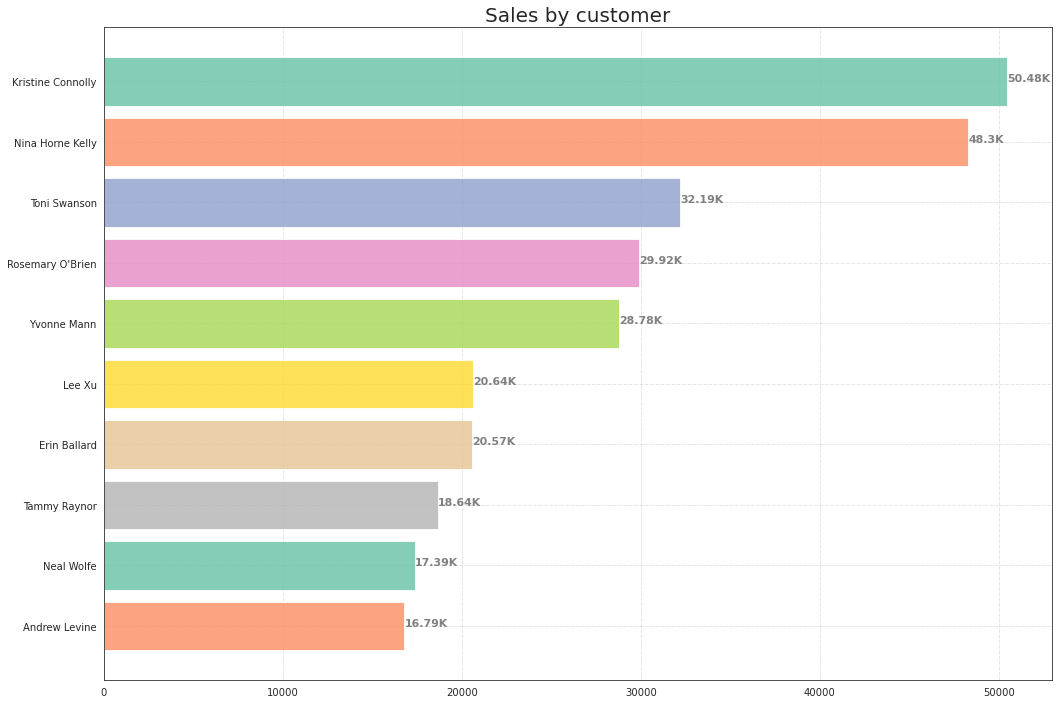

In [131]:
from numerize import numerize

fig, ax = plt.subplots(figsize=(17,12))
ax.barh(sales_by_cust.index[:10], sales_by_cust[:10], color = colors, alpha = 0.8)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.4)
ax.invert_yaxis()
ax.set_title('Sales by customer', fontsize=20)

for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.4,
             str(numerize.numerize(i.get_width())),
             fontsize = 11, fontweight ='bold',
             color ='grey')


### Average of time delivery

In [132]:
df_merge['Time Delivery'] = df_merge['Ship Date'] -  df_merge['Order Date']
df_merge['Time Delivery'] = df_merge['Time Delivery'].dt.days
df_merge.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Name,Product Base Margin,...,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Customer Name,Birthday,Time Delivery
0,20847,High,0.01,2.84,0.93,3,Express Air,Corporate,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,...,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,Bonnie Potter,1990-01-01,1
1,20228,Not Specified,0.02,500.98,26.00,5,Delivery Truck,Home Office,Global Troy™ Executive Leather Low-Back Tilter,0.60,...,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,Ronnie Proctor,1990-01-02,2
2,21776,Critical,0.06,9.48,7.29,11,Regular Air,Home Office,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,...,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,Marcus Dunlap,1990-01-03,2
3,24844,Medium,0.09,78.69,19.99,14,Regular Air,Small Business,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,...,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,Gwendolyn F Tyson,1990-01-04,2
4,24846,Medium,0.08,3.28,2.31,14,Regular Air,Small Business,Newell 321,0.56,...,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,Gwendolyn F Tyson,1990-01-04,1


In [133]:
avg_time_delivery = df_merge.groupby(df_merge['Ship Mode'])['Time Delivery'].mean()

Text(0.5, 1.0, 'Average of time delivery')

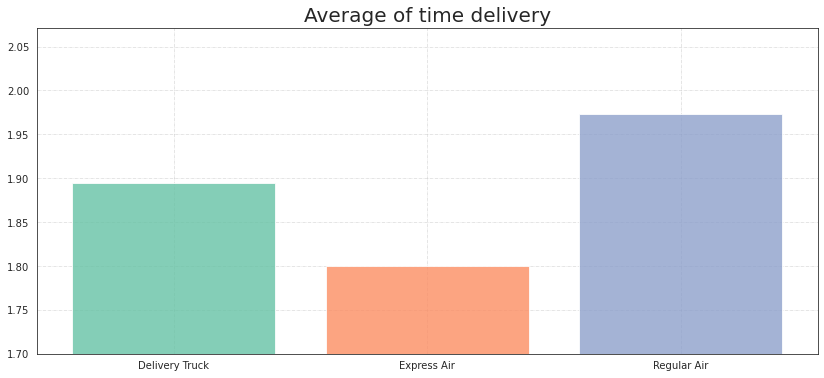

In [134]:
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(avg_time_delivery.index, avg_time_delivery, color = colors, alpha = 0.8)
ax.set_ylim(ymin=1.7)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.4)
ax.set_title('Average of time delivery', fontsize=20)

### Sales by state

In [135]:
df_usa = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv')
df_usa = df_usa[['State', 'Postal']]
df_usa.rename(columns={'State': 'State or Province'}, inplace=True)

df_usa_merge = df_merge.merge(df_usa, how='left', on='State or Province')

states_sales = df_usa_merge.groupby(df_usa_merge['Postal'])['Sales'].sum()
states_sales.sort_values(ascending=False).head(10)

Postal
CA    288310.61
NY    223930.48
IL     98971.25
TX     93082.73
FL     87651.11
WA     83468.06
MI     69641.81
OH     69452.82
DC     68946.66
MA     59114.82
Name: Sales, dtype: float64

In [136]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=states_sales.index, # Spatial coordinates
    z = round(states_sales, -2), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    marker_line_color='white',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = 'Sales by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

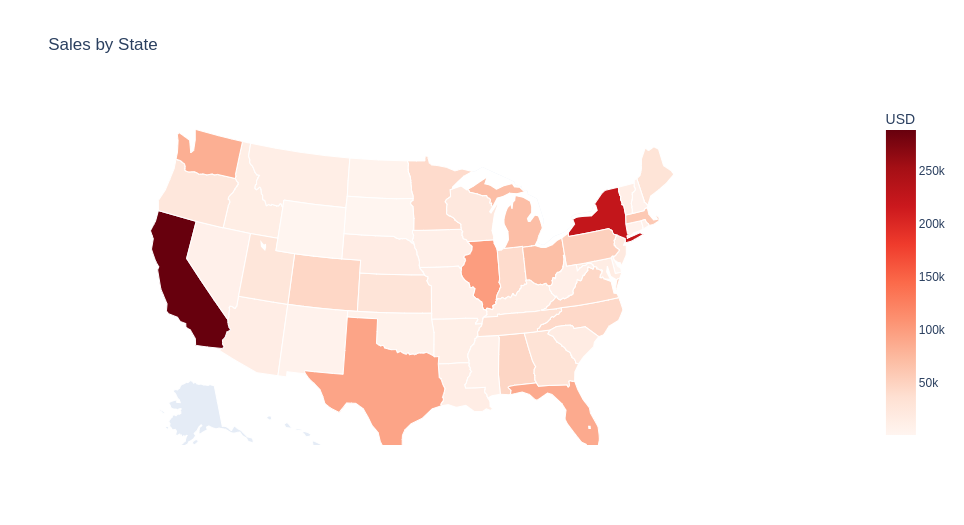